# Programming Exercise 1: Linear Regression
*Code's author: Natália Tenório Maia*<br>
*Solution for [Exercise 1](https://www.coursera.org/learn/machine-learning/home/week/2) of Coursera's Machine Learning course by Andrew Ng.*
<br>
<br>
There are many different ways to solve this exercise. Here you will learn just one possible way, where I tried to stick with the original idea proposed in the exercise's pdf.
<br>
<br>
In this exercise, we will implement linear regression and get to see it work on data.

## Part 1 - Linear regression with one variable
In this part of this exercise, we will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. <br>
**Goal:** We would like to use this data to help determine which city to expand to next.
<br>
Steps:<br>
1 - Import data; <br>
2 - Visualize data;<br>
3 - Fit parameters to minimize cost function;<br>
4 - Predict profit.

### Importing data

In [1]:
import numpy as np                       # package for scientific computing
import matplotlib.pyplot as plt          # plotting library
from mpl_toolkits.mplot3d import Axes3D  # package for plotting 3D surfaces

In [2]:
# Loading the dataset:
dataset = np.loadtxt('ex1data1.txt',delimiter=',')
dataset.shape

(97, 2)

In [3]:
# Let's see what this data looks like:
dataset[:3]

array([[ 6.1101, 17.592 ],
       [ 5.5277,  9.1302],
       [ 8.5186, 13.662 ]])

### Plotting data

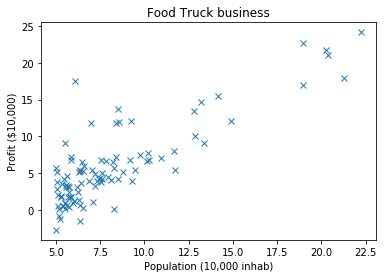

In [4]:
m = len(dataset) # number of examples
x = dataset[:,0] # population data
y = dataset[:,1] # profit data
plt.plot(x,y,'x')
plt.title('Food Truck business')
plt.xlabel('Population (10,000 inhab)')
plt.ylabel('Profit ($10,000)')
plt.show()

Roughly, the profit increases linearly with the population. Linear Regression is, therefore, a good choice to make predictions for this food truck business.

### Gradient Descent

The hypothesis of linear regression is given by <br>
$$h_{\theta}\left(X\right)=X\theta,$$ <br>
with $X_{m\times k}$ and $\theta_{k\times1}$ expressed as <br>
$$
X=\left[\begin{array}{cccc}
x_{0}^{(1)} & x_{1}^{(1)} & ... & x_{k}^{(1)}\\
x_{0}^{(2)} & x_{1}^{(2)} & ... & x_{k}^{(2)}\\
\vdots & \vdots & \vdots & \vdots\\
x_{0}^{(m)} & x_{1}^{(m)} & ... & x_{k}^{(m)}
\end{array}\right],\:\:\:\theta=\begin{bmatrix}\theta_{0}\\
\theta_{1}\\
\vdots\\
\theta_{k}
\end{bmatrix},
$$<br>
where $k$ is the number of features and $m$ is the number of examples in the training set. The cost function of the linear regression is <br>
$$
J\left(\theta\right)=\frac{1}{2m}\sum_{i=1}^{m}\left(h_{\theta}\left(x^{\left(i\right)}\right)-y^{\left(i\right)}\right)^{2},
$$<br>
and, consequently, its gradient is <br>
$$
\theta_{j}=\theta_{j}-\alpha\frac{1}{m}\sum_{i=1}^{m}\left(h_{\theta}\left(x^{\left(i\right)}\right)-y^{\left(i\right)}\right)x_{j}^{\left(i\right)}
$$<br>
for $j=0,...,k$, with $\alpha$ being the learning rate.

In [5]:
# Let's write x and y as column vectors instead of lists:
x=x.reshape(-1,1); y=y.reshape(-1,1)

# Now let's add the bias units to x:
X = np.append(np.ones((m,1)), x, axis=1)
X[:3]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186]])

In [6]:
# ----------------------------------------- Cost function ------------------------------------------------------
def costfunction(theta,X,y):
    h = np.matmul(X,theta)            # linear regression hypothesis
    J = (1/(2*m))*(np.sum((h-y)**2))  # linear regression cost function 
    return J
#---------------------------------------------------------------------------------------------------------------

theta = np.zeros((2,1))             
J = costfunction(theta,X,y)
J

32.072733877455676

The result above is in accordance with section 2.2.3 of the pdf file. <br>
Now let's implement the gradient descent algorithm in order to find the values for the parameters $\theta_{0}$ and $\theta_{1}$ which will minimize the cost function:

In [7]:
# ----------------------------------------- Gradient descent algorithm ------------------------------------------

def GD(theta,X,y,alpha,ite):
    # theta: initial value of theta
    # alpha: learning rate
    # ite: number of iterations
    
    temp = np.zeros((2,1))     # temporary value of theta during iterations 
    VJ = np.zeros((ite,1))     # vector to store values of J

    for k in range(ite):
        h = np.matmul(X,theta) # updates linear regression hypothesis
        VJ[k] = costfunction(theta,X,y)       # stores the value of J at each iteration to investigate convergence
        temp = theta - alpha*(1/m)*np.matmul((X.T),(h-y))        
        theta = temp           # updates theta
    return theta, VJ
#---------------------------------------------------------------------------------------------------------------

ite = 1500                 
alpha = 0.01               
init_theta = np.zeros((2,1))

# Fitted theta:
theta, VJ = GD(init_theta,X,y,alpha,ite)

# UPDATED cost function, with fitted parameters
J = costfunction(theta,X,y)
J

4.483388256587725

In [8]:
# Let us check that the cost function was really converging to a minimum value as the iterations progressed:
VJ[:5]

array([[32.07273388],
       [ 6.73719046],
       [ 5.93159357],
       [ 5.90115471],
       [ 5.89522859]])

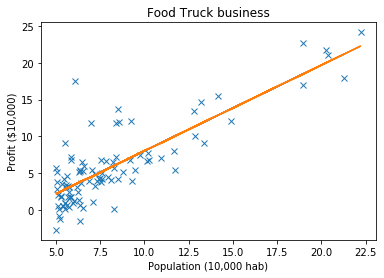

In [9]:
# Visualizing the fitted line
h = np.matmul(X,theta)

plt.plot(X[:,1],y,'x')
plt.plot(X[:,1],h);
plt.title('Food Truck business'); plt.xlabel('Population (10,000 hab)'); plt.ylabel('Profit ($10,000)');

The blue points are the training dataset. The red curve is the prediction from the linear regression model. The result looks good, this gives us confidence to proceed and make predictions for the food truck business. 

### Prediction 

Our final values for θ will now be used to make predictions on profits in areas of 35,000 and 70,000 people:

In [10]:
Xnew = np.array([[1, 3.5], [1, 7]])

def Prediction(X):
    Prediction = np.matmul(X,theta)
    return Prediction
Prediction(Xnew)

print("Linear Regression prediction:")
print("")
print("Profit in an area with 35,000 inhabitants: "+str(round(Prediction(Xnew)[0].item()*10000,2)))
print("Profit in an area with 70,000 inhabitants: "+str(round(Prediction(Xnew)[1].item()*10000,2)))

Linear Regression prediction:

Profit in an area with 35,000 inhabitants: 4519.77
Profit in an area with 70,000 inhabitants: 45342.45


This result tells us that a city with 75000 inhabitants will profit about 10 times more than a city which has half of the population.

### Visualizing $J(\theta)$

To understand the cost function $J(\theta)$ better, you will now plot the cost over a 2-dimensional grid of $\theta_{0}$ and $\theta_{1}$ values.

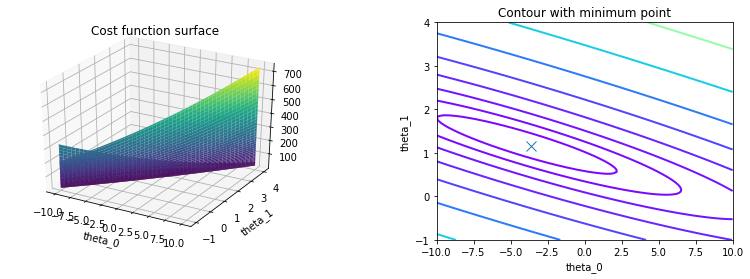

In [11]:
# Grid over which we will calculate J:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
# Initializing J_vals to a matrix of 0's:
J_vals = np.zeros( ( len(theta0_vals), len(theta1_vals) ) )
# Fill out J_vals:
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([ [theta0_vals[i]], [theta1_vals[j]] ])
        J_vals[i,j] = costfunction(t,X,y)        
# Because of the way meshgrids work in the surface command, we need to
# transpose J_vals before calling surface, or else the axes will be flipped:
J_vals = J_vals.T

# Surface plot:
fig = plt.figure(figsize=(13, 4)); plt.subplots_adjust(wspace=0.45);
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
plt.xlabel('theta_0'); plt.ylabel('theta_1'); plt.title('Cost function surface')

# Contour plot:
ax = plt.subplot(122)
plt.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='rainbow', levels=np.logspace(-2, 3, 20))
plt.plot(theta[0], theta[1], 'x', ms=10, lw=2)
plt.xlabel('theta_0'); plt.ylabel('theta_1'); plt.title('Contour with minimum point');

## Part 2 -  Optional Exercise: Linear regression with multiple variables

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices. We already have the collected data read to be loaded.<br>
The file ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.<br>
**Goal:** Predict the best price for a house to be sold.<br>
Steps:<br>
1 - Load data;<br>
2 - Visualize data;<br>
3 - Feature scaling; <br>
4 - Implement Gradient Descent algorithm;<br>
5 - Choose better learning rate;<br>
6 - Predict.<br>
7 - Predict using a different algorithm and compare with previous prediction.

### Importing data

In [12]:
dataset2 = np.loadtxt('ex1data2.txt',delimiter=',')
dataset2.shape

(47, 3)

In [13]:
dataset2[:5,:]

array([[2.104e+03, 3.000e+00, 3.999e+05],
       [1.600e+03, 3.000e+00, 3.299e+05],
       [2.400e+03, 3.000e+00, 3.690e+05],
       [1.416e+03, 2.000e+00, 2.320e+05],
       [3.000e+03, 4.000e+00, 5.399e+05]])

### Plotting data

In [14]:
m = len(dataset2)
X = np.append(np.ones((m,1)), dataset2[:,:2], axis=1)
y = dataset2[:,2]/100000; y=y.reshape(-1,1);
# Above we are dividing y by 100,000 to work with
# units of $100,000. This is just to avoid handling large numbers.

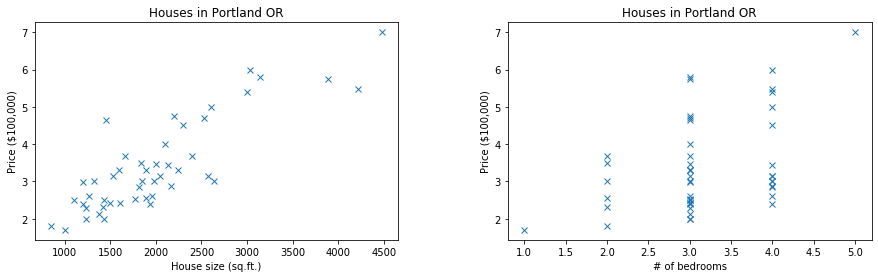

In [15]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(X[:,1],y,'x')
plt.title('Houses in Portland OR')
plt.xlabel('House size (sq.ft.)'); plt.ylabel('Price ($100,000)');
plt.subplot(1,2,2)
plt.plot(X[:,2],y,'x')
plt.title('Houses in Portland OR')
plt.xlabel('# of bedrooms'); plt.ylabel('Price ($100,000)');
plt.subplots_adjust(wspace=0.3)

**Left graph:** We can rougly say that there is a linear increase of price regarding the size of the house in square feet.<br>
**Right graph:** There is a large variation of prices of houses that have 3 and 4 bedrooms. This variation can be explained by different reasons: the age of the house, its location, the quality of the materials used to build it, etc. We do not have access to this info in the dataset though.

### Feature normalization

Below we see that the second column of the matrix X has values that are larger, by a magnitude of 1000, than the values in the other two columns:

In [25]:
X[:3]

array([[1.000e+00, 2.104e+03, 3.000e+00],
       [1.000e+00, 1.600e+03, 3.000e+00],
       [1.000e+00, 2.400e+03, 3.000e+00]])

In this case, it can be helpful to do some feature scaling in order to make our optimization algorithm more efficient later one.

There are many different ways to implement feature normalization in python, here I'm showing one way that I came up which allows me to have a better control of the scaling process:

In [16]:
# Feature normalization function related to training dataset X:
def FN(Matrix,X,feat_col):
    M = np.zeros(Matrix.shape)
    for i in range(M.shape[0]):
            for j in range(M.shape[1]):
                M[i,j] = Matrix[i,j]
    for i in range(len(M)):
        val = (M[i,feat_col]-np.mean(X[:,feat_col]))/np.std(X[:,feat_col])
        M[i,feat_col] = val
    return M

# Now let's create a new X matrix with the second and the third column normalized.
# For that, we have to apply the function FN twice, for each of the columns we
# want normalized, which are column 1 and 2:
Xnorm = FN(FN(X,X,1),X,2)
Xnorm[:3,:]

array([[ 1.        ,  0.13141542, -0.22609337],
       [ 1.        , -0.5096407 , -0.22609337],
       [ 1.        ,  0.5079087 , -0.22609337]])

### Gradient descent

We can use the gradient descent GD( ) function that we defined earlier:

In [17]:
ite = 300               
alpha = 0.05              
init_theta = np.zeros((Xnorm.shape[1],1))

theta, VJ = GD(init_theta,Xnorm,y,alpha,ite)
theta

array([[ 3.40412589],
       [ 1.0937452 ],
       [-0.06505078]])

In [18]:
# Let's check if J was really decreasing with the iterations in the gradient descent algorithm:
VJ[:5]

array([[6.55915481],
       [5.92592289],
       [5.35732588],
       [4.84659089],
       [4.38767761]])

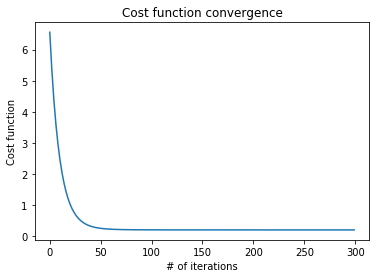

In [19]:
plt.plot(np.arange(0,len(VJ),1),VJ);
plt.title('Cost function convergence'); plt.xlabel('# of iterations'); plt.ylabel('Cost function');

We can see that the cost function started to stabilize to its minimal value around 50 iterations. Let's see how this changes when we choose a different value for the learning rate.

### Learning rate
Let's quickly investigate how the final cost function, given a fixed number of iterations, would change as a function of the learning rate choice:

In [20]:
vals = [0.001,0.03,0.07,0.1,0.3,0.4,0.5,1,1.5]
for alpha in vals:
    theta = GD(init_theta,Xnorm,y,alpha,300)[0]
    J = (1/(2*m))*(np.sum((np.matmul(Xnorm,theta)-y)**2))
    print('For learning rate '+str(alpha)+', the cost function ends up being '+str(J)+'.')

For learning rate 0.001, the cost function ends up being 3.6586736787339373.
For learning rate 0.03, the cost function ends up being 0.20437909452650702.
For learning rate 0.07, the cost function ends up being 0.20432800610251128.
For learning rate 0.1, the cost function ends up being 0.20432800506056104.
For learning rate 0.3, the cost function ends up being 0.20432800506028284.
For learning rate 0.4, the cost function ends up being 0.2043280050602828.
For learning rate 0.5, the cost function ends up being 0.20432800506028284.
For learning rate 1, the cost function ends up being 0.2043280050602828.
For learning rate 1.5, the cost function ends up being 7.39504647419056e+75.


Looking at the result above, we see that, to get quick convergence, a good choice for the learning rate is any value between 0.1 and 1. Above that, the algorithm starts to diverge, and below that we make the convergence happen in a longer time (over the course of a larger number of iterations). Let's choose learning rate equal to 0.4:

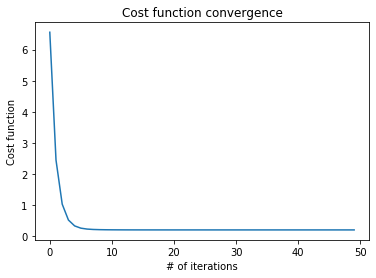

In [21]:
Jvals = GD(init_theta,Xnorm,y,0.4,50)[1]
plt.plot(np.arange(0,len(Jvals),1),Jvals);
plt.title('Cost function convergence'); plt.xlabel('# of iterations'); plt.ylabel('Cost function');

We see that, by adjusting the learning rate, we can get a quick convergence to the cost function's minimal value. This time, the convergence happens around 10 iterations, which tells us that our algorithm has become much more efficient.

### Prediction

Let's now use our algorithm to predict the value a two houses which are not in the training dataset.
house 1: size 3600 sq.ft., # of bedrooms 4 ;
house 2: size 4100 sq.ft., # of bedrooms 6 ;

In [22]:
ite = 50               
alpha = 0.4             
init_theta = np.zeros((Xnorm.shape[1],1))
theta, VJ = GD(init_theta,Xnorm,y,alpha,ite) # fitted theta

Xnew = np.array([[1, 3600, 4],[1, 4100, 6],[1, 1650, 3]]) # new entries
Xnewnorm = FN(FN(Xnew,X,1),X,2)              # values normalized with respected to the training set X.

Prediction = np.matmul(Xnewnorm,theta) # linear regression prediction

print(str(Xnew[0,1])+'sq.ft. house, with '+str(Xnew[0,2])+' bedrooms, can be sold by $'+str(int(Prediction[0]*100000))+'.')
print(str(Xnew[1,1])+'sq.ft. house, with '+str(Xnew[1,2])+' bedrooms, can be sold by $'+str(int(Prediction[1]*100000))+'.')
print(str(Xnew[2,1])+'sq.ft. house, with '+str(Xnew[2,2])+' bedrooms, can be sold by $'+str(int(Prediction[2]*100000))+'.')

3600sq.ft. house, with 4 bedrooms, can be sold by $555800.
4100sq.ft. house, with 6 bedrooms, can be sold by $607937.
1650sq.ft. house, with 3 bedrooms, can be sold by $293082.


### Normal Equation (alternative optimization  algorithm)

The analytical solution for the linear regression optimization problem is given by the normal equation formula:

$$
\theta=\left(X^{T}X\right)^{-1}X^{T}y,
$$<br>
This approach is good when the number of features in the training data set is, roughly saying, smaller than 10,000 (which is our case).

In [23]:
NEtheta = np.matmul(np.linalg.inv(np.matmul(X.T,X)),np.matmul(X.T,y))
NEtheta

array([[ 0.8959791 ],
       [ 0.00139211],
       [-0.08738019]])

In [24]:
Prediction = np.matmul(Xnew,NEtheta) # linear regression prediction
print(str(Xnew[0,1])+'sq.ft. house, with '+str(Xnew[0,2])+' bedrooms, can be sold by $'+str(int(Prediction[0]*100000))+'.')
print(str(Xnew[1,1])+'sq.ft. house, with '+str(Xnew[1,2])+' bedrooms, can be sold by $'+str(int(Prediction[1]*100000))+'.')
print(str(Xnew[2,1])+'sq.ft. house, with '+str(Xnew[2,2])+' bedrooms, can be sold by $'+str(int(Prediction[2]*100000))+'.')

3600sq.ft. house, with 4 bedrooms, can be sold by $555804.
4100sq.ft. house, with 6 bedrooms, can be sold by $607933.
1650sq.ft. house, with 3 bedrooms, can be sold by $293081.


The predictions that we get through the Normal Equation (NE) method are basically equal to the prediction made through the Gradient Descent (GD) algorithm. But with NE we were able to make a prediction writing much fewer lines of code in comparison to what we've done in the GD section. Also, we did not have to normalize feautures, nor have to pick a learning rate.<br> It seems that NE is a much more efficient choice of optimization algorithm for this specific situation that we worked on. But the NE can have problems for more complex situations, such as: simple linear regression is not an option; the matrix $X^{T}X$ is non-invertible; or the number of features is too big, like $n>10,000$. <br>

With this observation, we conclude Exercise 1.